In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,Interpolations,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
using ProfileView

In [4]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [5]:
mat1 = material(1.0^2,1.0)
matSc = material(epstable("gold"),1.0)
mat2 = material(4.1^2,1.0);

In [6]:
w,d = 413.,10.
rc = 2.
Nc,Nw,Nd = 3,10,5
xC = (0,0);

In [7]:
rod = Rod(w,d,rc,Nc,Nw,Nd);

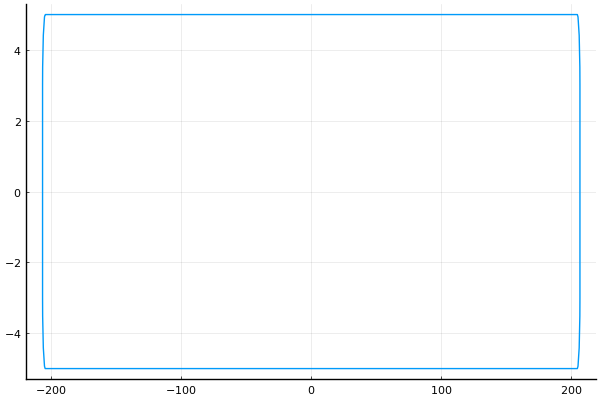

In [8]:
X,Y = getSurfPoints(rod)
plot(X,Y,legend=:none)

In [9]:
k0 = 2π/370
k = mat1.k(k0)
α = 10:0.01:89.9

kpar = k*sin.(π/180*(90 .- α));

In [10]:
layer = layerstructure([mat1,mat2],[0.0,],"up")
rtC = rtcoeffs(layer,k0,kpar,"up")
r,t = rtC.r,rtC.t;

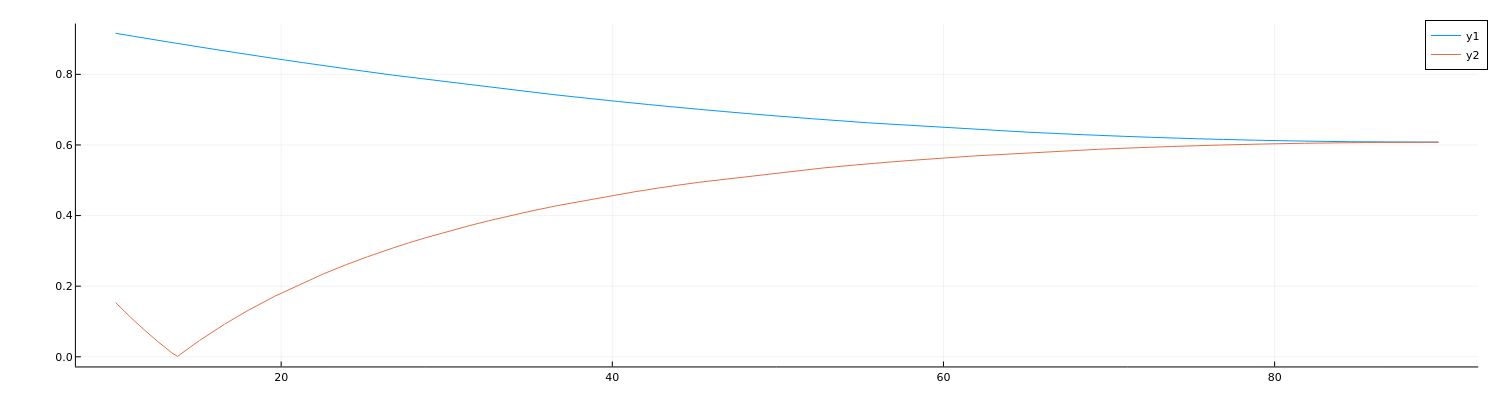

In [11]:
plotly()
plot(α,abs.(r.TE))
plot!(α,abs.(r.TM))

In [12]:
EL = 2k0

0.03396316382259236

In [13]:
SPar = SommerfieldParams(layer,EL);

In [14]:
gfIn = greenFunLayerInd(k0,SPar,(500.,10),(40.,10));

In [15]:
@time greenF = greenFunLayer(k0,SPar,(500.,10),(40.,10));

 53.434587 seconds (250.12 M allocations: 10.227 GiB, 8.01% gc time, 0.04% compilation time)


In [16]:
gsf = gfIn.gInd;

In [17]:
matA = layer.mat;

ε1f,εLf = matA[1].ε,matA[end].ε;

In [18]:
εLf(k0)

16.81

In [19]:
r = [1.,1.]
rl = [1.,0.]

2-element Vector{Float64}:
 1.0
 0.0

In [20]:
greenF.gTot(r,rl)

1.2011599793604355 + 0.47010842828599514im

In [21]:
greenF.DgTot(r,rl)

2-element Vector{ComplexF64}:
                0.0 - 0.0im
 0.3021168337851703 - 0.0076197359006686585im

In [22]:
(rl-r)/norm(rl-r)

2-element Vector{Float64}:
  0.0
 -1.0

In [23]:
fnTest = (r::Vector{Float64},rl::Vector{Float64}) -> gsf(abs(r[1]-rl[1]),r[1]+rl[2])*sign(r[1])

#105 (generic function with 1 method)

In [24]:
typeof(fnTest)

var"#105#106"

# ======================================================

In [25]:
x,xˡ = 0.,400.
y,yˡ = 0.,0.;

In [26]:
EL,EH = 2k0,1e-4
xdif = abs(x-xˡ)
ysum = y+yˡ

0.0

In [27]:
Evalgreenrefns1(k0,xdif,ysum,EL,EH,layer)

-0.05692810167337146 - 0.049837355583522785im

In [28]:
λi,λf,nλ = 300.,900.,3

(300.0, 900.0, 3)

In [29]:
xE,nx = 500.,3
yE,ny = 40.,3

(40.0, 3)

In [30]:
kA = collect(LinRange(2π/λf,2π/λi,nλ));

In [31]:
xdA = collect(LinRange(0.,xE,nx)) 
ysA = collect(LinRange(0.,yE,ny));

In [32]:
@time arrGr = [Evalgreenrefns1(kA[k],xdA[i],ysA[j],2kA[k],EH,layer) for i in eachindex(xdA), j in eachindex(ysA), k in eachindex(kA)];

 31.357594 seconds (168.04 M allocations: 6.890 GiB, 8.03% gc time, 1.86% compilation time)


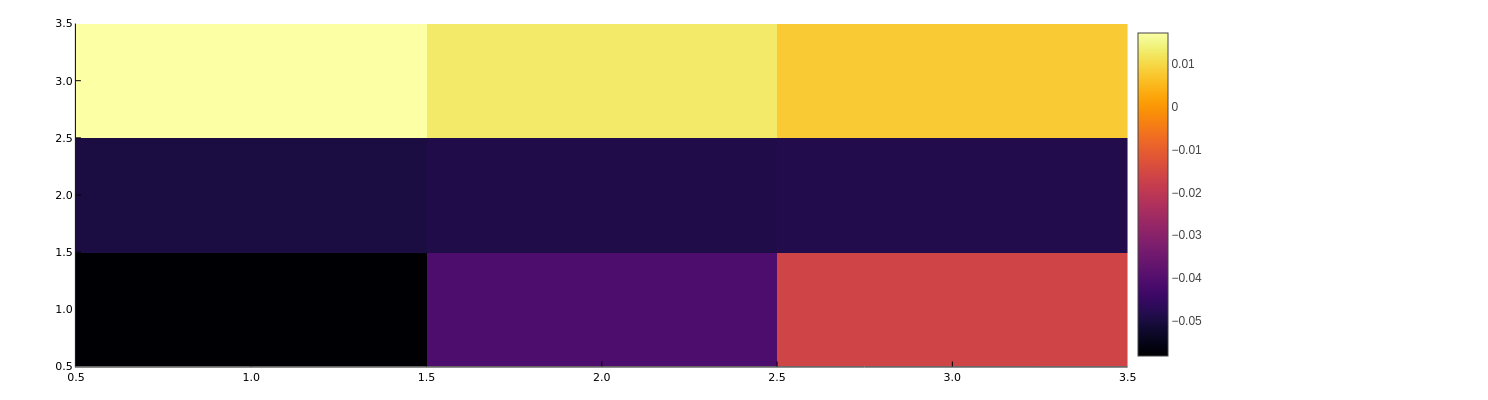

In [33]:
heatmap(real.(arrGr[:,:,3]))

In [34]:
2π/kA[3]

300.0

In [35]:
difarrGrx = diff(arrGr,dims=1)
difarrGry = diff(arrGr,dims=2);

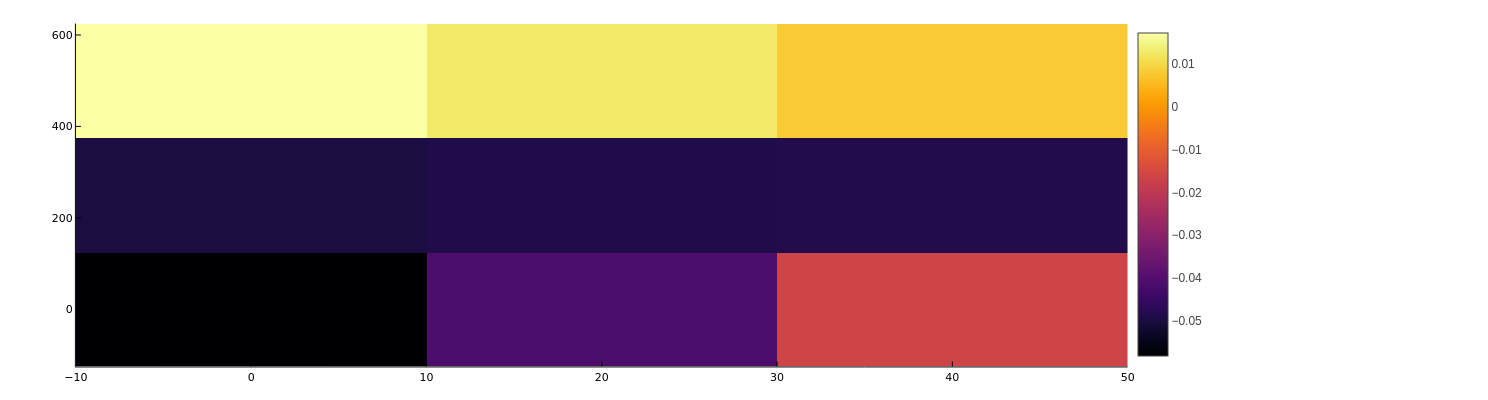

In [36]:
heatmap(ysA,xdA,real.(arrGr[:,:,3]))

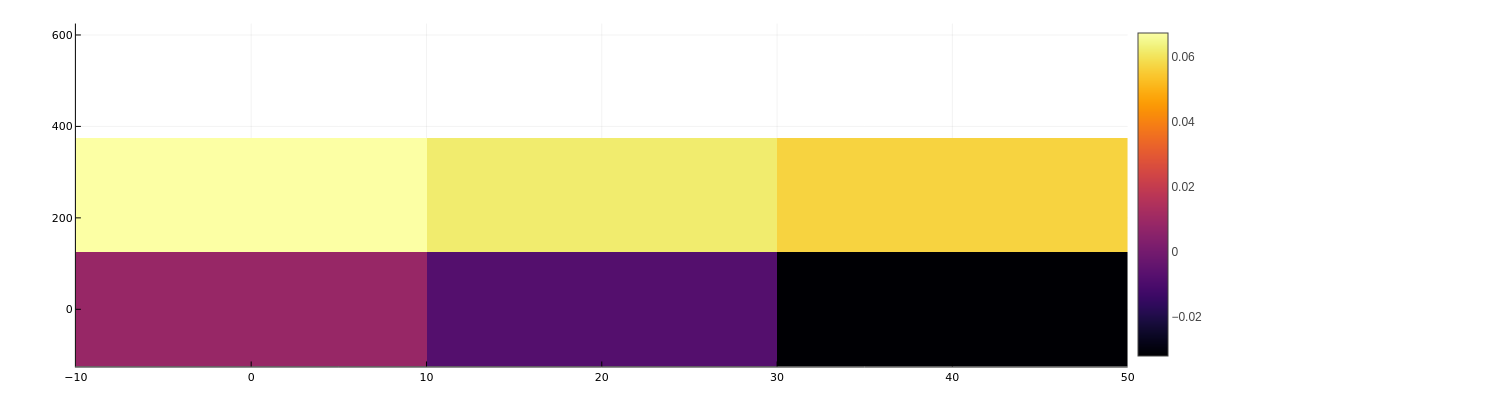

In [37]:
heatmap(ysA,xdA,real.(difarrGrx[:,:,3]))

In [38]:
itpGind = LinearInterpolation((xdA,ysA,kA),arrGr)
itpGindDx = LinearInterpolation((xdA[1:end-1],ysA,kA),difarrGrx)
itpGindDy = LinearInterpolation((xdA,ysA[1:end-1],kA),difarrGry);

In [39]:
gifn = (x,y,k)-> itpGind(x,y,k)
gifnDx = (x,y,k)-> itpGindDx(x,y,k)
gifnDy = (x,y,k)-> itpGindDy(x,y,k)

#113 (generic function with 1 method)

In [40]:
gifnDx(0.0,0.,2π/600)

0.10286574747952712 - 0.02272532080177661im

In [41]:
xg = 0:20:500.
yg = 0:0.1:40.

0.0:0.1:40.0

In [42]:
hgr = [gifn(xg[i],yg[j],2π/370) for i ∈ eachindex(xg), j ∈ eachindex(yg)];

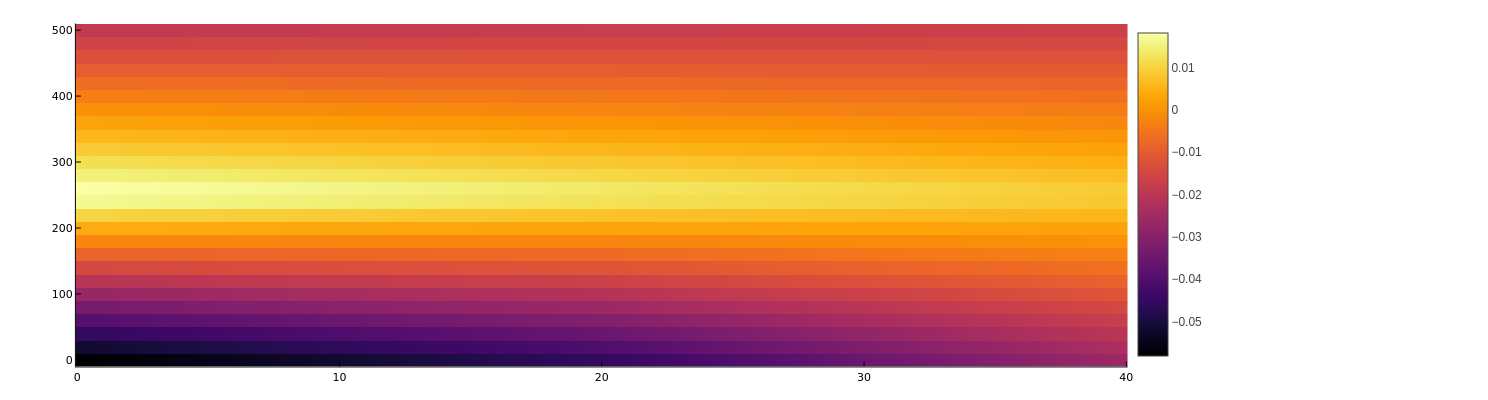

In [43]:
heatmap(yg,xg,real.(hgr))

In [44]:
hgrt = [gfIn.gInd(xg[i],yg[j]) for i ∈ eachindex(xg), j ∈ eachindex(yg)];

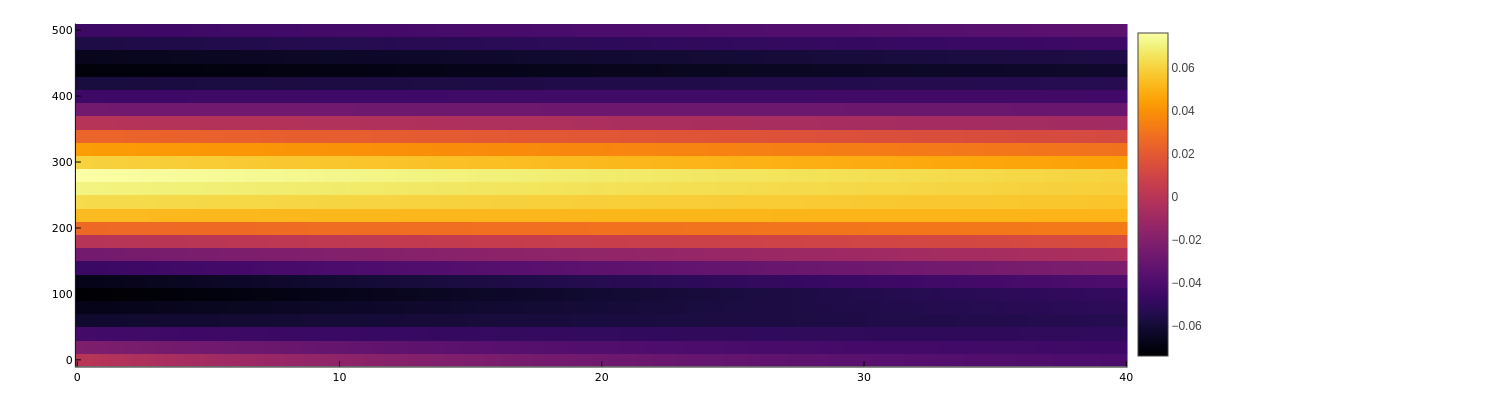

In [45]:
heatmap(yg,xg,imag.(hgrt))

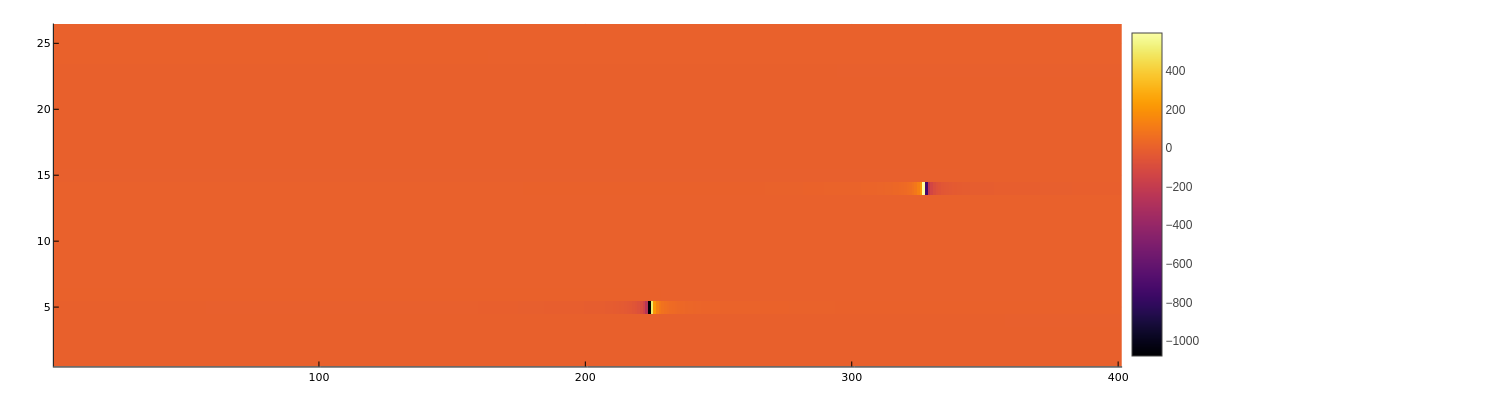

In [46]:
err = abs.(real.(hgrt)-real.(hgr))./real.(hgrt)

heatmap(err)

In [47]:
hgr2 = [gfIn.gInd(xg[i],yg[j]) for i ∈ eachindex(xg), j ∈ eachindex(yg)];

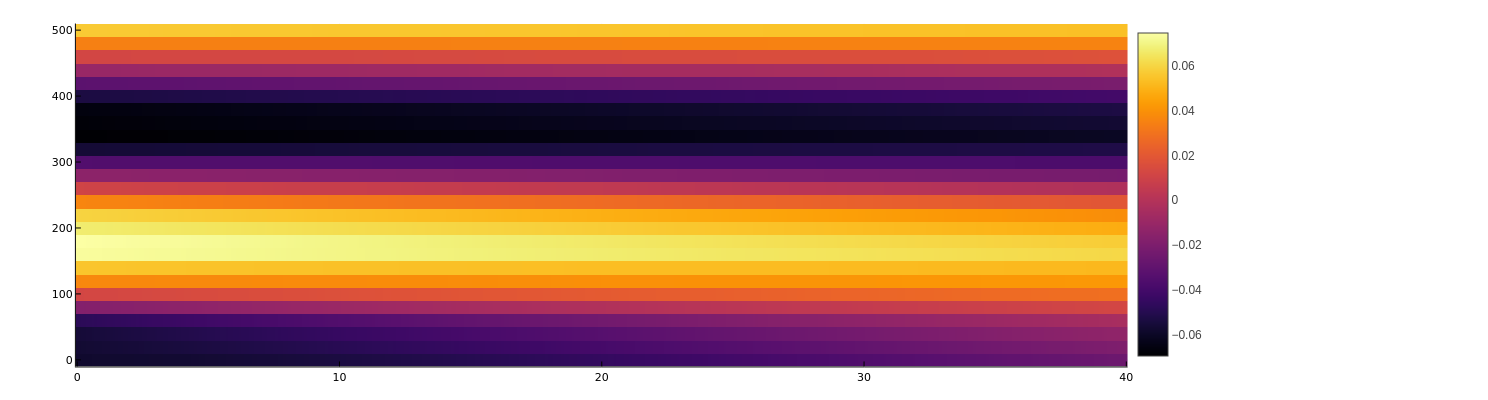

In [48]:
heatmap(yg,xg,real(hgr2))